# IML2 FINAL PROJECT - RETAIL SALES PREDITION

DONE BY -


*   SRIVIJAYALAKSHMI AT [1RVU22BSC012]
*   ADISHREE K [1RVU22BSC001]




PROBLEM STATEMENT - The goal is to enhance sales and profit for business organizations by improving the accuracy of sales forecasting through the selection and optimization of an efficient predictive algorithm.

VARIABLE DEFINITION

In [ ]:
# User_ID	User ID
# Product_ID	Product ID
# Gender	Sex of User
# Age	Age in bins
# Occupation	Occupation (Masked)
# City_Category	Category of the City (A,B,C)
# Stay_In_Current_City_Years	Number of years stay in current city
# Marital_Status	Marital Status
# Product_Category_1	Product Category (Masked)
# Product_Category_2	Product may belongs to other category also (Masked)
# Product_Category_3	Product may belongs to other category also (Masked)
# Purchase	Purchase Amount (Target Variable)

IMPORTING LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# DATASET OVERVIEW






In [ ]:
data = pd.read_csv("BlackFridaySales.csv")

In [ ]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [ ]:
data.shape

(550068, 12)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB



* Age should be treated as a numerical column
* City_Category we can convert this to a numerical column and should look at the frequency of each city category.
* Gender has two values and should be converted to binary values
* Product_Category_2 and Product_Category_3 have null values

In [ ]:
data.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               17
Product_Category_3               15
Purchase                      18105
dtype: int64

# DATA PREPROCESSING

**1. CALCULATING TOTAL NULL VALUES**

In [ ]:
data.isnull().sum()  #no. of null values in the column

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [ ]:
data.isnull().sum()/data.shape[0]*100  #no. of null values in percentage

User_ID                        0.000000
Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            31.566643
Product_Category_3            69.672659
Purchase                       0.000000
dtype: float64

There are 31% null values in the Product_Category_2 and 69% null values in the Product_Category_3


*   Product_Category_2 ( 173638/550068 )
*   Product_Category_3 ( 383247/550068 )



**2. ENCODING**


*   ONE HOT ENCODING



In [ ]:
df = data.copy()

In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [ ]:
#Dummy Variables:
df = pd.get_dummies(df, columns=['Stay_In_Current_City_Years'])

In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,1000001,P00069042,F,0-17,10,A,0,3,NaN,NaN,8370,False,False,True,False,False
1,1000001,P00248942,F,0-17,10,A,0,1,6.0,14.0,15200,False,False,True,False,False
2,1000001,P00087842,F,0-17,10,A,0,12,NaN,NaN,1422,False,False,True,False,False
3,1000001,P00085442,F,0-17,10,A,0,12,14.0,NaN,1057,False,False,True,False,False
4,1000002,P00285442,M,55+,16,C,0,8,NaN,NaN,7969,False,False,False,False,True




*   LABEL ENCODING



In [ ]:
from sklearn.preprocessing import LabelEncoder
lr = LabelEncoder()

In [ ]:
df['Gender'] = lr.fit_transform(df['Gender'])

In [ ]:
df['Age'] = lr.fit_transform(df['Age'])

In [ ]:
df['City_Category'] = lr.fit_transform(df['City_Category'])

In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,1000001,P00069042,0,0,10,0,0,3,NaN,NaN,8370,False,False,True,False,False
1,1000001,P00248942,0,0,10,0,0,1,6.0,14.0,15200,False,False,True,False,False
2,1000001,P00087842,0,0,10,0,0,12,NaN,NaN,1422,False,False,True,False,False
3,1000001,P00085442,0,0,10,0,0,12,14.0,NaN,1057,False,False,True,False,False
4,1000002,P00285442,1,6,16,2,0,8,NaN,NaN,7969,False,False,False,False,True


**3. DROPPING UNWANTED COLUMN**

In [ ]:
columns_to_drop = ["Product_Category_3"]
df = df.drop(columns_to_drop, axis=1, errors='ignore')

In [ ]:
columns_to_drop = ["Product_ID"]
df = df.drop(columns_to_drop, axis=1, errors='ignore')

In [ ]:
columns_to_drop = ["User_ID"]
df = df.drop(columns_to_drop, axis=1, errors='ignore')

In [ ]:
df.head()

,Gender,Age,Occupation,City_Category,Marital_Status,Product_Category_1,Product_Category_2,Purchase,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,0,0,10,0,0,3,NaN,8370,False,False,True,False,False
1,0,0,10,0,0,1,6.0,15200,False,False,True,False,False
2,0,0,10,0,0,12,NaN,1422,False,False,True,False,False
3,0,0,10,0,0,12,14.0,1057,False,False,True,False,False
4,1,6,16,2,0,8,NaN,7969,False,False,False,False,True


**4. PLOTING BOXPLOT FOR FINDING OUTLIERS**

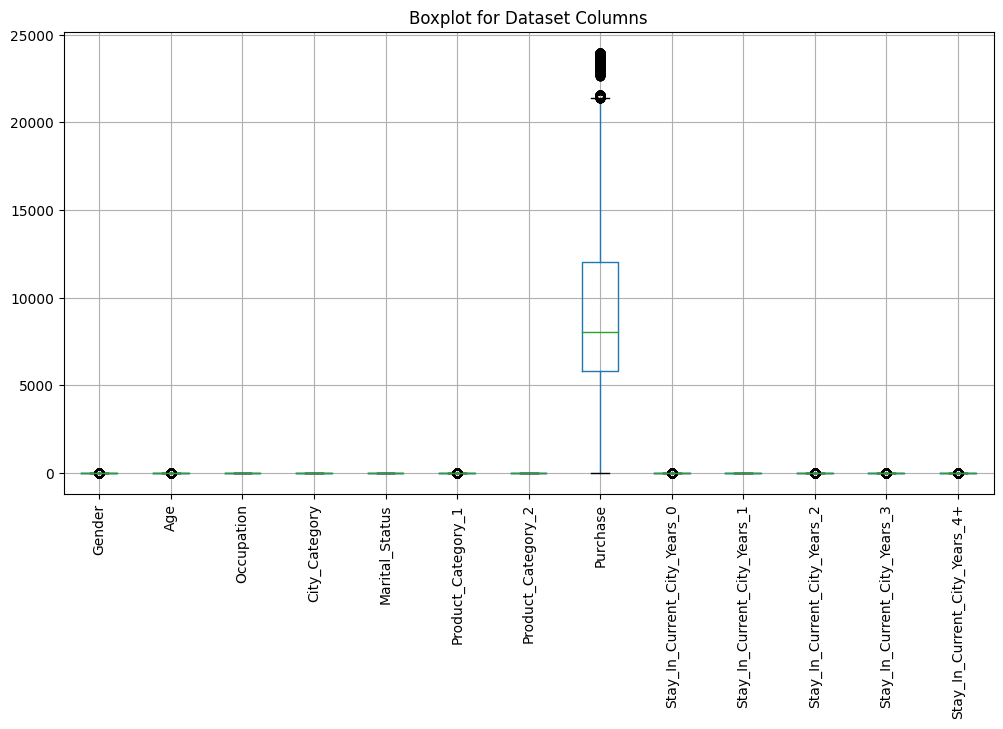

In [ ]:
import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(12, 6))

# Create boxplot for all columns
df.boxplot(rot=90)

# Set plot title
plt.title('Boxplot for Dataset Columns')

# Show plot
plt.show()

NOTE - As per the box plot there are Outliers in boxplot column

**5. CALCULATING Z- SCORE**

In [ ]:
import pandas as pd
from scipy.stats import zscore

# Assuming df is your DataFrame containing the dataset
# Select numerical columns to calculate Z-score
numerical_columns = df.select_dtypes(include=['int', 'float']).columns

# Calculate Z-score for numerical columns
df_zscore = df.copy()  # Create a copy of the DataFrame
df_zscore[numerical_columns] = df_zscore[numerical_columns].apply(zscore)

# Now df_zscore contains the Z-score standardized values for numerical columns
df_zscore.head()

,Gender,Age,Occupation,City_Category,Marital_Status,Product_Category_1,Product_Category_2,Purchase,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,-1.746513,-1.844248,0.294864,-1.371516,-0.833018,-0.610809,NaN,-0.177973,False,False,True,False,False
1,-1.746513,-1.844248,0.294864,-1.371516,-0.833018,-1.118912,NaN,1.181756,False,False,True,False,False
2,-1.746513,-1.844248,0.294864,-1.371516,-0.833018,1.675656,NaN,-1.561193,False,False,True,False,False
3,-1.746513,-1.844248,0.294864,-1.371516,-0.833018,1.675656,NaN,-1.633858,False,False,True,False,False
4,0.572570,2.588277,1.214734,1.259336,-0.833018,0.659449,NaN,-0.257805,False,False,False,False,True


NOTE - as we can see from the z score table , we can conclude that , there are no outliers because all the values are below +- 3. (+- 3 is considered as threshold)

# MAKING A COPY OF THE DATASET

In [ ]:
df.head()

,Gender,Age,Occupation,City_Category,Marital_Status,Product_Category_1,Product_Category_2,Purchase,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,0,0,10,0,0,3,NaN,8370,False,False,True,False,False
1,0,0,10,0,0,1,6.0,15200,False,False,True,False,False
2,0,0,10,0,0,12,NaN,1422,False,False,True,False,False
3,0,0,10,0,0,12,14.0,1057,False,False,True,False,False
4,1,6,16,2,0,8,NaN,7969,False,False,False,False,True


In [ ]:
df_mean = df.copy()

In [ ]:
df_zero = df.copy()

# CALCULATING MEAN , MEDIAN AND MODE

In [ ]:
# mean value for entire dataset
df_mean.mean(numeric_only=True)

Gender                              0.753105
Age                                 2.496430
Occupation                          8.076707
City_Category                       1.042640
Marital_Status                      0.409653
Product_Category_1                  5.404270
Product_Category_2                  9.842329
Purchase                         9263.968713
Stay_In_Current_City_Years_0        0.135252
Stay_In_Current_City_Years_1        0.352358
Stay_In_Current_City_Years_2        0.185137
Stay_In_Current_City_Years_3        0.173224
Stay_In_Current_City_Years_4+       0.154028
dtype: float64

In [ ]:
# median value for entire dataset
df_mean.median(numeric_only=True)

Gender                              1.0
Age                                 2.0
Occupation                          7.0
City_Category                       1.0
Marital_Status                      0.0
Product_Category_1                  5.0
Product_Category_2                  9.0
Purchase                         8047.0
Stay_In_Current_City_Years_0        0.0
Stay_In_Current_City_Years_1        0.0
Stay_In_Current_City_Years_2        0.0
Stay_In_Current_City_Years_3        0.0
Stay_In_Current_City_Years_4+       0.0
dtype: float64

In [ ]:
# mode value for entire dataset
df_mean.mode(numeric_only=True)

,Gender,Age,Occupation,City_Category,Marital_Status,Product_Category_1,Product_Category_2,Purchase,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,1,2,4,1,0,5,8.0,7011,False,False,False,False,False


In [ ]:
# mean value for product_category2
mean_value = df_mean['Product_Category_2'].mean()
print(f"Mean value of 'Product_Category_2': {mean_value}")


Mean value of 'Product_Category_2': 9.842329251122386


# 1. FILLING THE NaN VALUES WITH MEAN

In [ ]:
df_mean.head()

,Gender,Age,Occupation,City_Category,Marital_Status,Product_Category_1,Product_Category_2,Purchase,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,0,0,10,0,0,3,NaN,8370,False,False,True,False,False
1,0,0,10,0,0,1,6.0,15200,False,False,True,False,False
2,0,0,10,0,0,12,NaN,1422,False,False,True,False,False
3,0,0,10,0,0,12,14.0,1057,False,False,True,False,False
4,1,6,16,2,0,8,NaN,7969,False,False,False,False,True


In [ ]:
#filling the NaN value with mean
mean_value = df_mean['Product_Category_2'].mean()
df_mean['Product_Category_2'].fillna(mean_value, inplace=True)
df_mean.head()

,Gender,Age,Occupation,City_Category,Marital_Status,Product_Category_1,Product_Category_2,Purchase,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,0,0,10,0,0,3,9.842329,8370,False,False,True,False,False
1,0,0,10,0,0,1,6.000000,15200,False,False,True,False,False
2,0,0,10,0,0,12,9.842329,1422,False,False,True,False,False
3,0,0,10,0,0,12,14.000000,1057,False,False,True,False,False
4,1,6,16,2,0,8,9.842329,7969,False,False,False,False,True


In [ ]:
df_mean.shape

(550068, 13)

SPLITTING THE DATASET INTO TRAIN AND TEST

Train 80%
Test 20%

In [ ]:
# Select ratio
ratio = 0.80

total_rows = df_mean.shape[0]
train_size = int(total_rows*ratio)

# Split data into test and train
train = df_mean[0:train_size]
test = df_mean[train_size:]

In [ ]:
# print train set
print("Train dataframe")
(train)

# print test set
print("Test dataframe")
(test)

Train dataframe
Test dataframe


,Gender,Age,Occupation,City_Category,Marital_Status,Product_Category_1,Product_Category_2,Purchase,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
440054,1,2,0,1,0,1,6.000000,19509,False,False,False,False,True
440055,1,2,0,1,0,1,8.000000,15302,False,False,False,False,True
440056,1,2,0,1,0,8,9.842329,9957,False,False,False,False,True
440057,1,2,0,1,0,6,16.000000,20416,False,False,False,False,True
440058,1,2,0,1,0,1,11.000000,19285,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1,5,13,1,1,20,9.842329,368,False,True,False,False,False
550064,0,2,1,2,0,20,9.842329,371,False,False,False,True,False
550065,0,2,15,1,1,20,9.842329,137,False,False,False,False,True
550066,0,6,1,2,0,20,9.842329,365,False,False,True,False,False


# Analysing purchase vs frequency

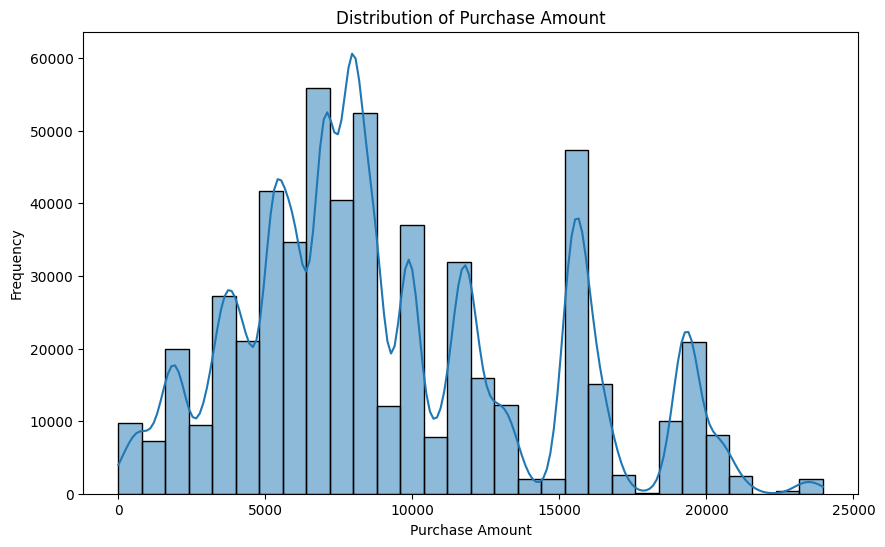

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(df_mean['Purchase'], bins=30, kde=True)
plt.title('Distribution of Purchase Amount')
plt.xlabel('Purchase Amount')
plt.ylabel('Frequency')
plt.show()

In [ ]:
#independent variable
X = df_mean.drop("Purchase", axis=1)
X.head()

,Gender,Age,Occupation,City_Category,Marital_Status,Product_Category_1,Product_Category_2,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,0,0,10,0,0,3,9.842329,False,False,True,False,False
1,0,0,10,0,0,1,6.000000,False,False,True,False,False
2,0,0,10,0,0,12,9.842329,False,False,True,False,False
3,0,0,10,0,0,12,14.000000,False,False,True,False,False
4,1,6,16,2,0,8,9.842329,False,False,False,False,True


In [ ]:
#dependent variable
y = df_mean['Purchase']
y.head()

0     8370
1    15200
2     1422
3     1057
4     7969
Name: Purchase, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# ALGORITHNMS

LINEAR REGGRESION

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
lr.intercept_
lr.coef_
y_pred = lr.predict(X_test)

Evaluation matrix of Linear reggresion

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

In [ ]:
mean_squared_error(y_test, y_pred)
print("mean_squared_error - ",(mean_squared_error(y_test, y_pred)))

mean_squared_error -  22020230.51167046


In [ ]:
r2_score(y_test, y_pred)
print("r2_score - ",(r2_score(y_test, y_pred)))

r2_score -  0.1272624935124126


In [ ]:
from math import sqrt
print("RMSE - ",sqrt(mean_squared_error(y_test, y_pred)))

RMSE -  4692.571844060617


Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)
dt_y_pred = regressor.predict(X_test)

Evaluation matrix of Decision tree reggresion

In [ ]:
mean_squared_error(y_test, dt_y_pred)
print("mean_squared_error - ",(mean_squared_error(y_test, dt_y_pred)))

mean_squared_error -  10020069.715204353


In [ ]:
r2_score(y_test, dt_y_pred)
print("r2_score - ",(r2_score(y_test, dt_y_pred)))

r2_score -  0.6028701582644855


In [ ]:
from math import sqrt
print("RMSE - ",sqrt(mean_squared_error(y_test, dt_y_pred)))

RMSE -  3165.4493701849588


RAMDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestRegressor
RFregressor = RandomForestRegressor(random_state = 0)
RFregressor.fit(X_train, y_train)
rf_y_pred = RFregressor.predict(X_test)

Evaluation matrix of Decision tree reggresion

In [ ]:
mean_squared_error(y_test, rf_y_pred)
print("mean_squared_error - ",(mean_squared_error(y_test, rf_y_pred)))

mean_squared_error -  9092290.063188441


In [ ]:
r2_score(y_test, rf_y_pred)
print("r2_score - ",(r2_score(y_test, rf_y_pred)))

r2_score -  0.6396412583508879


In [ ]:
from math import sqrt
print("RMSE - ",sqrt(mean_squared_error(y_test, rf_y_pred)))

RMSE -  3015.3424454261312


XG-Boost Regressor

In [ ]:
from xgboost.sklearn import XGBRegressor
xgb_reg = XGBRegressor(learning_rate=1.0, max_depth=6, min_child_weight=40, seed=0)
xgb_reg.fit(X_train, y_train)
xgb_y_pred = xgb_reg.predict(X_test)

In [ ]:
mean_squared_error(y_test, xgb_y_pred)
print("mean_squared_error - ",(mean_squared_error(y_test, xgb_y_pred)))

mean_squared_error -  8485615.550807547


In [ ]:
r2_score(y_test, xgb_y_pred)
print("r2_score - ",(r2_score(y_test, xgb_y_pred)))

r2_score -  0.6636858568351891


In [ ]:
from math import sqrt
print("RMSE - ",sqrt(mean_squared_error(y_test, xgb_y_pred)))

RMSE -  2913.00799017228


evaluation matrix result -



1.   linear regression - RMSE : 4692.55
1.   decision tree regressor - RMSE : 3246.22
2.   random forest regressor - RMSE : 2965.09
4.   xg-boost regressor  - RMSE : 2850.57



*   Among then XG-Boost is the best model.





# 2. FILLING THE NaN VALUES WITH ZERO

In [ ]:
df_zero.head()

,Gender,Age,Occupation,City_Category,Marital_Status,Product_Category_1,Product_Category_2,Purchase,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,0,0,10,0,0,3,NaN,8370,False,False,True,False,False
1,0,0,10,0,0,1,6.0,15200,False,False,True,False,False
2,0,0,10,0,0,12,NaN,1422,False,False,True,False,False
3,0,0,10,0,0,12,14.0,1057,False,False,True,False,False
4,1,6,16,2,0,8,NaN,7969,False,False,False,False,True


In [ ]:
df_zero['Product_Category_2'].fillna(0, inplace=True)
df_zero.head()

,Gender,Age,Occupation,City_Category,Marital_Status,Product_Category_1,Product_Category_2,Purchase,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,0,0,10,0,0,3,0.0,8370,False,False,True,False,False
1,0,0,10,0,0,1,6.0,15200,False,False,True,False,False
2,0,0,10,0,0,12,0.0,1422,False,False,True,False,False
3,0,0,10,0,0,12,14.0,1057,False,False,True,False,False
4,1,6,16,2,0,8,0.0,7969,False,False,False,False,True


In [ ]:
df_zero.shape

(550068, 13)

In [ ]:
# Select ratio
ratio = 0.80

total_rows = df_zero.shape[0]
train_size = int(total_rows*ratio)

# Split data into test and train
train = df_zero[0:train_size]
test = df_zero[train_size:]

In [ ]:
# print train set
print("Train dataframe")
(train)

# print test set
print("Test dataframe")
(test)

Train dataframe
Test dataframe


,Gender,Age,Occupation,City_Category,Marital_Status,Product_Category_1,Product_Category_2,Purchase,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
440054,1,2,0,1,0,1,6.0,19509,False,False,False,False,True
440055,1,2,0,1,0,1,8.0,15302,False,False,False,False,True
440056,1,2,0,1,0,8,0.0,9957,False,False,False,False,True
440057,1,2,0,1,0,6,16.0,20416,False,False,False,False,True
440058,1,2,0,1,0,1,11.0,19285,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1,5,13,1,1,20,0.0,368,False,True,False,False,False
550064,0,2,1,2,0,20,0.0,371,False,False,False,True,False
550065,0,2,15,1,1,20,0.0,137,False,False,False,False,True
550066,0,6,1,2,0,20,0.0,365,False,False,True,False,False


In [ ]:
#independent variable
X = df_zero.drop("Purchase", axis=1)
X.head()

,Gender,Age,Occupation,City_Category,Marital_Status,Product_Category_1,Product_Category_2,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,0,0,10,0,0,3,0.0,False,False,True,False,False
1,0,0,10,0,0,1,6.0,False,False,True,False,False
2,0,0,10,0,0,12,0.0,False,False,True,False,False
3,0,0,10,0,0,12,14.0,False,False,True,False,False
4,1,6,16,2,0,8,0.0,False,False,False,False,True


In [ ]:
#dependent variable
y = df_zero['Purchase']
y.head()

0     8370
1    15200
2     1422
3     1057
4     7969
Name: Purchase, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

MODELLING

LINEAR REGGRESION

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
lr.intercept_
lr.coef_
y_pred = lr.predict(X_test)

<!-- Evaluation matrix of Linear reggresion -->

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

In [ ]:
mean_squared_error(y_test, y_pred)
print("mean_squared_error - ",(mean_squared_error(y_test, y_pred)))

mean_squared_error -  22081636.97564303


In [ ]:
r2_score(y_test, y_pred)
print("r2_score - ",(r2_score(y_test, y_pred)))

r2_score -  0.12482874404638222


In [ ]:
from math import sqrt
print("RMSE - ",sqrt(mean_squared_error(y_test, y_pred)))

RMSE -  4699.110232335802


Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)
dt_y_pred = regressor.predict(X_test)

Evaluation matrix of Decision tree reggresion

In [ ]:
mean_squared_error(y_test, dt_y_pred)
print("mean_squared_error - ",(mean_squared_error(y_test, dt_y_pred)))

mean_squared_error -  10019675.837603332


In [ ]:
r2_score(y_test, dt_y_pred)
print("r2_score - ",(r2_score(y_test, dt_y_pred)))

r2_score -  0.6028857689891414


In [ ]:
from math import sqrt
print("RMSE - ",sqrt(mean_squared_error(y_test, dt_y_pred)))

RMSE -  3165.387154457308


RAMDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestRegressor
RFregressor = RandomForestRegressor(random_state = 0)
RFregressor.fit(X_train, y_train)
rf_y_pred = RFregressor.predict(X_test)

Evaluation matrix of Decision tree reggresion

In [ ]:
mean_squared_error(y_test, rf_y_pred)
print("mean_squared_error - ",(mean_squared_error(y_test, rf_y_pred)))

mean_squared_error -  9098481.004734967


In [ ]:
r2_score(y_test, rf_y_pred)
print("r2_score - ",(r2_score(y_test, rf_y_pred)))

r2_score -  0.6393958900344545


In [ ]:
from math import sqrt
print("RMSE - ",sqrt(mean_squared_error(y_test, rf_y_pred)))

RMSE -  3016.368844278658


XG-Boost Regressor

In [ ]:
from xgboost.sklearn import XGBRegressor
xgb_reg = XGBRegressor(learning_rate=1.0, max_depth=6, min_child_weight=40, seed=0)
xgb_reg.fit(X_train, y_train)
xgb_y_pred = xgb_reg.predict(X_test)

Evaluation matrix of XG-Boost Regressor

In [ ]:
mean_squared_error(y_test, xgb_y_pred)
print("mean_squared_error - ",(mean_squared_error(y_test, xgb_y_pred)))

mean_squared_error -  8483192.178832028


In [ ]:
r2_score(y_test, xgb_y_pred)
print("r2_score - ",(r2_score(y_test, xgb_y_pred)))

r2_score -  0.6637819034053686


In [ ]:
from math import sqrt
print("RMSE - ",sqrt(mean_squared_error(y_test, xgb_y_pred)))

RMSE -  2912.5920034965466


evaluation matrix result -

1.   linear regression - RMSE : 4699.09
1.   decision tree regressor - RMSE : 3243.74
2.   random forest regressor - RMSE :   2966.13
2.   xg-boost regressor - RMSE : 2847.03



*   Among them XG-Boost is the best model.


NOTE - since the evaluation matrix score was better when the NaN value were filled with zero. we are going to take the dataframe which was handeled with zero for our model tuning.


# MODELLING WITH XG-BOOST REGRESSOR

In [ ]:
df.head()

,Gender,Age,Occupation,City_Category,Marital_Status,Product_Category_1,Product_Category_2,Purchase,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,0,0,10,0,0,3,NaN,8370,False,False,True,False,False
1,0,0,10,0,0,1,6.0,15200,False,False,True,False,False
2,0,0,10,0,0,12,NaN,1422,False,False,True,False,False
3,0,0,10,0,0,12,14.0,1057,False,False,True,False,False
4,1,6,16,2,0,8,NaN,7969,False,False,False,False,True


In [ ]:
df_hyp = df_zero.copy()
df_hyp.head()

,Gender,Age,Occupation,City_Category,Marital_Status,Product_Category_1,Product_Category_2,Purchase,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,0,0,10,0,0,3,0.0,8370,False,False,True,False,False
1,0,0,10,0,0,1,6.0,15200,False,False,True,False,False
2,0,0,10,0,0,12,0.0,1422,False,False,True,False,False
3,0,0,10,0,0,12,14.0,1057,False,False,True,False,False
4,1,6,16,2,0,8,0.0,7969,False,False,False,False,True


Import Libraries

In [ ]:
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import r2_score


Preprocess the Data

In [ ]:
X = df.drop(columns=['Purchase'])  # Features
y = df['Purchase']  # Target variable
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (550068, 12)
Shape of y: (550068,)


Create XGBoost Regressor Model

In [ ]:
xgb_model = XGBRegressor()
print("Default XGBoost model parameters:\n", xgb_model.get_params())

Default XGBoost model parameters:
 {'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': None, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': None, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': None, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}


Perform k-Fold Cross-Validation

In [ ]:
# Define the number of folds for cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
# Perform k-fold cross-validation using R² as the scoring metric
cv_scores = cross_val_score(xgb_model, X, y, cv=kfold, scoring='r2')
print("Cross-validation R² scores:", cv_scores)
print("Average R² score:", np.mean(cv_scores))

Cross-validation R² scores: [0.65705894 0.66270904 0.66608409 0.66190486 0.6684066 ]
Average R² score: 0.6632327058693667


Hyperparameter Tuning with Grid Search

In [ ]:
# Define the grid of parameters to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(XGBRegressor(), param_grid, cv=kfold, scoring='r2')

# Fit the GridSearchCV object to the data
grid_search.fit(X, y)

# Print the best parameters and best cross-validation R² score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation R² score:", grid_search.best_score_)


0.6774611931046848



NOTE - EVEN AFTER INCREASISNG THE PARAMETER THE MODEL GAVE LESS ACCURACY.




# PEARSON COEFFICIENT


In [ ]:
df_zero.head()

,Gender,Age,Occupation,City_Category,Marital_Status,Product_Category_1,Product_Category_2,Purchase,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,0,0,10,0,0,3,0.0,8370,False,False,True,False,False
1,0,0,10,0,0,1,6.0,15200,False,False,True,False,False
2,0,0,10,0,0,12,0.0,1422,False,False,True,False,False
3,0,0,10,0,0,12,14.0,1057,False,False,True,False,False
4,1,6,16,2,0,8,0.0,7969,False,False,False,False,True


In [ ]:
df_new = df_zero.copy()
df_new.head()

,Gender,Age,Occupation,City_Category,Marital_Status,Product_Category_1,Product_Category_2,Purchase,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,0,0,10,0,0,3,0.0,8370,False,False,True,False,False
1,0,0,10,0,0,1,6.0,15200,False,False,True,False,False
2,0,0,10,0,0,12,0.0,1422,False,False,True,False,False
3,0,0,10,0,0,12,14.0,1057,False,False,True,False,False
4,1,6,16,2,0,8,0.0,7969,False,False,False,False,True


In [ ]:
import pandas as pd

def pearson_coefficient(x, y):
    # Convert x and y to numeric values, ignoring any non-numeric entries
    x_numeric = pd.to_numeric(x, errors='coerce')
    y_numeric = pd.to_numeric(y, errors='coerce')

    # Drop NaN values from both x and y
    x_cleaned = x_numeric.dropna()
    y_cleaned = y_numeric[y_numeric.index.isin(x_cleaned.index)]

    n = len(x_cleaned)
    if n == 0:
        return 0  # If no valid numeric values, return 0 correlation

    mean_x = x_cleaned.mean()
    mean_y = y_cleaned.mean()
    numerator = sum((xi - mean_x) * (yi - mean_y) for xi, yi in zip(x_cleaned, y_cleaned))
    denominator = (sum((xi - mean_x) ** 2 for xi in x_cleaned) * sum((yi - mean_y) ** 2 for yi in y_cleaned)) ** 0.5
    if denominator == 0:
        return 0
    else:
        return numerator / denominator

# Load your dataset into a pandas DataFrame `df_new`
df_new = pd.read_csv('BlackFridaySales.csv')

# Target variable ('Purchase')
target = df_new['Purchase']

# Calculate Pearson correlation coefficients between each feature and the target variable
correlation = {}
for column in df_new.columns:
    if column != 'Purchase':  # Exclude the target variable from features
        correlation[column] = pearson_coefficient(df_new[column], target)

# Sort correlation dictionary by values (correlation coefficients)
correlation_sorted = sorted(correlation.items(), key=lambda x: x[1])

# Print correlation between each feature and the label (in ascending order)
print("Correlation between each feature and the label (in ascending order):")
for feature, corr in correlation_sorted:
    print(f"{feature}: {corr}")


Correlation between each feature and the label (in ascending order):
Product_Category_1: -0.34370334591857254
Product_Category_2: -0.20991848524374718
Product_Category_3: -0.022005725564366797
Marital_Status: -0.000463376419760025
Product_ID: 0
Gender: 0
Age: 0
City_Category: 0
User_ID: 0.004715661643909321
Stay_In_Current_City_Years: 0.007275535737435823
Occupation: 0.020832616924618755


In [ ]:
df_new.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [ ]:
columns_to_drop = [
    "Product_ID", "User_ID", "Product_Category_3", "Gender",
    "Age", "Occupation", "City_Category", "Marital_Status",
    "Stay_In_Current_City_Years"
]
df_new = df_new.drop(columns=columns_to_drop, axis=1, errors='ignore')

In [ ]:
df_new.head()

,Product_Category_1,Product_Category_2,Purchase
0,3,NaN,8370
1,1,6.0,15200
2,12,NaN,1422
3,12,14.0,1057
4,8,NaN,7969


In [ ]:
df_new['Product_Category_2'].fillna(0, inplace=True)

In [ ]:
df_new.head()

,Product_Category_1,Product_Category_2,Purchase
0,3,0.0,8370
1,1,6.0,15200
2,12,0.0,1422
3,12,14.0,1057
4,8,0.0,7969


# HYPERPARAMETER TUNNING ON LINEAR REGGRESION

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Load your actual dataset into a DataFrame `df_new`
# Assuming `df_new` contains your large dataset with many columns
df_new = df_new

# Identify features (X) and target variable (y)
# Replace `'Purchase'` with your actual target variable name
target_variable = 'Purchase'
features = [col for col in df_new.columns if col != target_variable]

# Split the dataset into features (X) and target variable (y)
X = df_new[features]
y = df_new[target_variable]

# Perform data preprocessing (e.g., handle missing values, encode categorical variables, scale numerical features)
# Example: Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the scaled data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define the Linear Regression model
model = LinearRegression()

# Define the grid of hyperparameters to search over
param_grid = {
    'fit_intercept': [True, False],
    'positive': [False]  # Ensure coefficients are non-negative if needed
}

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best model from the GridSearchCV
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Best Parameters:", grid_search.best_params_)
print("Best Negative Mean Squared Error:", grid_search.best_score_)  # Negative because of scoring
print("Mean Squared Error on Test Set:", mse)
print("R^2 Score on Test Set:", r2)


Best Parameters: {'fit_intercept': True, 'positive': False}
Best Negative Mean Squared Error: -22244430.80573418
Mean Squared Error on Test Set: 22169864.70824632
R^2 Score on Test Set: 0.11765876242055728


In [ ]:
df_new.head()

,Product_Category_1,Product_Category_2,Purchase
0,3,0.0,8370
1,1,6.0,15200
2,12,0.0,1422
3,12,14.0,1057
4,8,0.0,7969


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr

# Assuming your target variable is named 'Purchase'
X = df_new.drop(columns=['Purchase'])
y = df_new['Purchase']

# Convert categorical variables into dummy/indicator variables (one-hot encoding)
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid to search
param_grid = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Decision Tree Regressor
dt_reg = DecisionTreeRegressor(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=dt_reg, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Perform GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Get the best model
best_dt_reg = grid_search.best_estimator_

# Predict on test data
y_pred = best_dt_reg.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate Pearson correlation coefficient
pearson_corr, _ = pearsonr(y_test, y_pred)
print("Pearson Correlation Coefficient:", pearson_corr)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best Score: -8939724.996891372
Root Mean Squared Error (RMSE): 3016.1045214087535
Pearson Correlation Coefficient: 0.7987443999890933


# CALCULATING PURCHASE AMOUNT ON UNSEEN DATA FOR LINEAR REGGRESION MODEL

In [ ]:
# calculating purchase value for linear reggresion

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Assume you have a trained linear regression model named 'lr'
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# Define a function to get user input for a categorical feature
def get_categorical_input(feature_name, options):
    while True:
        user_input = input(f"Enter {feature_name} ({', '.join(options)}): ").strip().upper()
        if user_input in options:
            return user_input
        else:
            print(f"Invalid input! Please choose one of: {', '.join(options)}")

# Define a function to get user input for a numerical feature
def get_numerical_input(feature_name):
    while True:
        user_input = input(f"Enter {feature_name}: ").strip()
        if user_input.isdigit():
            return int(user_input)
        else:
            print("Invalid input! Please enter a valid integer.")

# Sample user input functions
def get_user_input():
    new_input_data = {
        'Gender': get_categorical_input('Gender', ['M', 'F']),
        'Age': get_categorical_input('Age', ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']),
        'Occupation': get_numerical_input('Occupation'),
        'City_Category': get_categorical_input('City Category', ['A', 'B', 'C']),
        'Marital_Status': get_numerical_input('Marital Status (0 for single, 1 for married)'),
        'Product_Category_1': get_numerical_input('Product Category 1'),
        'Product_Category_2': get_numerical_input('Product Category 2'),
        'Stay_In_Current_City_Years_0': get_numerical_input('Stay in Current City for 0 Years (0 for False, 1 for True)'),
        'Stay_In_Current_City_Years_1': get_numerical_input('Stay in Current City for 1 Years (0 for False, 1 for True)'),
        'Stay_In_Current_City_Years_2': get_numerical_input('Stay in Current City for 2 Years (0 for False, 1 for True)'),
        'Stay_In_Current_City_Years_3': get_numerical_input('Stay in Current City for 3 Years (0 for False, 1 for True)'),
        'Stay_In_Current_City_Years_4+': get_numerical_input('Stay in Current City for 4 Years (0 for False, 1 for True)')
    }
    return pd.DataFrame([new_input_data])

# Get user input and prepare DataFrame
new_input_df = get_user_input()

#encoding for categorical variables
categorical_cols = ['Gender', 'Age', 'City_Category']
for col in categorical_cols:
    le = LabelEncoder()
    new_input_df[col] = le.fit_transform(new_input_df[col])

# Perform one-hot encoding for categorical variables
new_input_encoded = pd.get_dummies(new_input_df, columns=categorical_cols)

# Ensure consistent columns with the model's expected features
model_features = ['Gender_F', 'Gender_M', 'Age_0-17', 'Age_18-25', 'Age_26-35', 'Age_36-45', 'Age_46-50', 'Age_51-55', 'Age_55+',
                  'Occupation', 'City_Category_A', 'City_Category_B', 'City_Category_C',
                  'Marital_Status', 'Product_Category_1', 'Product_Category_2',
                  'Stay_In_Current_City_Years_0', 'Stay_In_Current_City_Years_1',
                  'Stay_In_Current_City_Years_2', 'Stay_In_Current_City_Years_3', 'Stay_In_Current_City_Years_4+']

# Add missing columns with default values
missing_columns = set(model_features) - set(new_input_encoded.columns)
for col in missing_columns:
    new_input_encoded[col] = 0

# Reorder columns to match the order of features used during training
new_input_encoded = new_input_encoded[model_features]

# Assuming 'lr' is your trained linear regression model
lr.coef_ = np.array([10, 5, -3, 4, 2, -1, 7, 8, 3, 0.5, 10, 5, 3, 1, 15, 7, 0, 0, 0, 0, 20])
lr.intercept_ = 50

# Use the trained model to predict purchase amount
predicted_purchase_amount = lr.predict([new_input_encoded.iloc[0]])

# Display the predicted purchase amount
print("\nPredicted Purchase Amount:")
print(f"${predicted_purchase_amount[0]:.2f}")


Enter Gender (M, F): m
Enter Age (0-17, 18-25, 26-35, 36-45, 46-50, 51-55, 55+): 18-25
Enter Occupation: 2
Enter City Category (A, B, C): c
Enter Marital Status (0 for single, 1 for married): 1
Enter Product Category 1: 2
Enter Product Category 2: 3
Enter Stay in Current City for 0 Years (0 for False, 1 for True): 0
Enter Stay in Current City for 1 Years (0 for False, 1 for True): 0
Enter Stay in Current City for 2 Years (0 for False, 1 for True): 0
Enter Stay in Current City for 3 Years (0 for False, 1 for True): 0
Enter Stay in Current City for 4 Years (0 for False, 1 for True): 1

Predicted Purchase Amount:
$123.00


# CALCULATING PURCHASE ON UNSEEN DATA FOR XG-BOOST REGGRESOR

In [ ]:
#CODE HAS A BUG
import pandas as pd
from xgboost import XGBRegressor

# Define a function to get user input for a categorical feature
def get_categorical_input(feature_name, options):
    while True:
        user_input = input(f"Enter {feature_name} ({', '.join(options)}): ").strip().upper()
        if user_input in options:
            return user_input
        else:
            print(f"Invalid input! Please choose one of: {', '.join(options)}")

# Define a function to get user input for a numerical feature
def get_numerical_input(feature_name):
    while True:
        user_input = input(f"Enter {feature_name}: ").strip()
        if user_input.isdigit():
            return int(user_input)
        else:
            print("Invalid input! Please enter a valid integer.")

# Sample user input functions
def get_user_input():
    new_input_data = {
        'Gender': get_categorical_input('Gender', ['M', 'F']),
        'Age': get_categorical_input('Age', ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']),
        'Occupation': get_numerical_input('Occupation'),
        'City_Category': get_categorical_input('City Category', ['A', 'B', 'C']),
        'Marital_Status': get_numerical_input('Marital Status (0 for single, 1 for married)'),
        'Product_Category_1': get_numerical_input('Product Category 1'),
        'Product_Category_2': get_numerical_input('Product Category 2'),
        'Stay_In_Current_City_Years_0': get_numerical_input('Stay in Current City for 0 Years (0 for False, 1 for True)'),
        'Stay_In_Current_City_Years_1': get_numerical_input('Stay in Current City for 1 Years (0 for False, 1 for True)'),
        'Stay_In_Current_City_Years_2': get_numerical_input('Stay in Current City for 2 Years (0 for False, 1 for True)'),
        'Stay_In_Current_City_Years_3': get_numerical_input('Stay in Current City for 3 Years (0 for False, 1 for True)'),
        'Stay_In_Current_City_Years_4+': get_numerical_input('Stay in Current City for 4 Years (0 for False, 1 for True)')
    }
    return pd.DataFrame([new_input_data])

# Encode categorical variables to numerical values
def encode_categorical_features(input_df):
    cat_cols = ['Gender', 'Age', 'City_Category']
    for col in cat_cols:
        input_df[col] = input_df[col].astype('category').cat.codes
    return input_df

# Function to predict purchase amount using the trained XGBoost model
def predict_purchase_amount(model, input_df):
    prepared_input_df = encode_categorical_features(input_df)
    predicted_purchase_amount = model.predict(prepared_input_df)
    return predicted_purchase_amount

# Assuming 'xgb_reg' is your XGBoost model
# Train the XGBoost model (replace X_train and y_train with your actual training data)
data = {
    'Gender': ['M', 'F', 'M', 'F'],
    'Age': ['18-25', '26-35', '36-45', '26-35'],
    'Occupation': [3, 4, 2, 4],
    'City_Category': ['C', 'B', 'A', 'C'],
    'Marital_Status': [1, 0, 1, 0],
    'Product_Category_1': [1, 0, 2, 3],
    'Product_Category_2': [2, 5, 3, 4],
    'Stay_In_Current_City_Years_0': [0, 0, 0, 0],
    'Stay_In_Current_City_Years_1': [0, 0, 0, 0],
    'Stay_In_Current_City_Years_2': [0, 0, 0, 0],
    'Stay_In_Current_City_Years_3': [1, 0, 0, 1],
    'Stay_In_Current_City_Years_4+': [0, 1, 0, 0],
    'Purchase_Amount': [100, 150, 200, 120]  # Example target variable (purchase amount)
}
df = pd.DataFrame(data)
X_train = df.drop('Purchase_Amount', axis=1)
y_train = df['Purchase_Amount']

# Initialize and train the XGBoost model
xgb_reg = XGBRegressor(learning_rate=1.0, max_depth=6, min_child_weight=40, seed=0)
X_train_encoded = encode_categorical_features(X_train)  # Encode categorical features in training data
xgb_reg.fit(X_train_encoded, y_train)

# Get user input for new data
new_input_df = get_user_input()

# Predict purchase amount using the trained XGBoost model
predicted_purchase_amount = predict_purchase_amount(xgb_reg, new_input_df)

# Display the predicted purchase amount
print("\nPredicted Purchase Amount:")
print(f"${predicted_purchase_amount[0]:.2f}")


Enter Gender (M, F): F
Enter Age (0-17, 18-25, 26-35, 36-45, 46-50, 51-55, 55+): 0-17
Enter Occupation: 3
Enter City Category (A, B, C): C
Enter Marital Status (0 for single, 1 for married): 0
Enter Product Category 1: 1
Enter Product Category 2: 4
Enter Stay in Current City for 0 Years (0 for False, 1 for True): 0
Enter Stay in Current City for 1 Years (0 for False, 1 for True): 0
Enter Stay in Current City for 2 Years (0 for False, 1 for True): 0
Enter Stay in Current City for 3 Years (0 for False, 1 for True): 0
Enter Stay in Current City for 4 Years (0 for False, 1 for True): 1

Predicted Purchase Amount:
$142.50
